<a href="https://colab.research.google.com/github/KrutikaChincholkar/ML_project/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-ef2b35e46434>:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


Mean Squared Error: 453.9890159005718


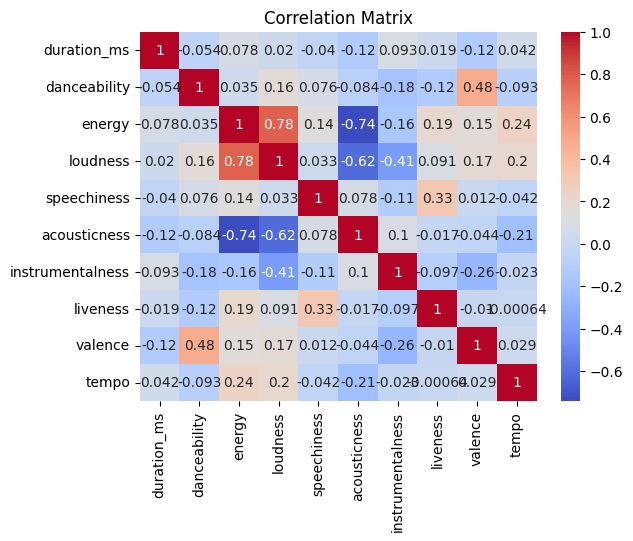

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


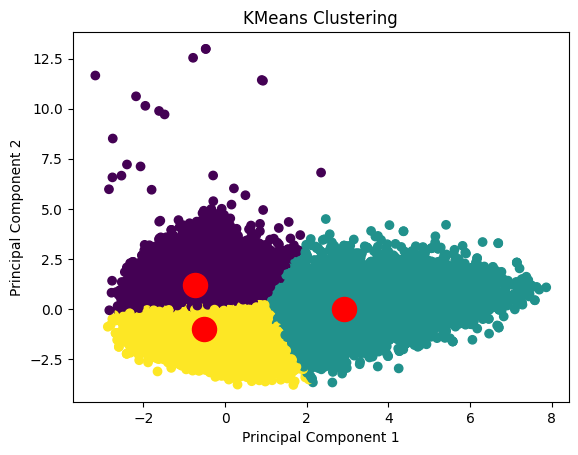

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_csv('dataset.csv')

data.dropna(inplace=True)

X = data[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
silent_songs = data[data['acousticness'] > 0.8]

silent_songs = silent_songs.sort_values(by='popularity', ascending=False)

if not silent_songs.empty:
    print("Recommended silent songs:")
    for index, song in silent_songs.head(10).iterrows():
        print("Artist:", song['artists'])
        print("Track Name:", song['track_name'])
        print("Popularity:", song['popularity'])
        print("--------------------")
else:
    print("Sorry, no silent songs found in the dataset.")


Recommended silent songs:
Artist: Billie Eilish
Track Name: everything i wanted
Popularity: 86.0
--------------------
Artist: XXXTENTACION
Track Name: Everybody Dies In Their Nightmares
Popularity: 85.0
--------------------
Artist: Billie Eilish
Track Name: Bored
Popularity: 85.0
--------------------
Artist: XXXTENTACION
Track Name: Everybody Dies In Their Nightmares
Popularity: 85.0
--------------------
Artist: Lord Huron
Track Name: The Night We Met
Popularity: 83.0
--------------------
Artist: dhruv
Track Name: double take
Popularity: 83.0
--------------------
Artist: Adele
Track Name: Someone Like You
Popularity: 81.0
--------------------
Artist: Tom Rosenthal
Track Name: Lights Are On
Popularity: 81.0
--------------------
Artist: Madison Beer
Track Name: Reckless
Popularity: 80.0
--------------------
Artist: Billie Eilish
Track Name: ocean eyes
Popularity: 80.0
--------------------


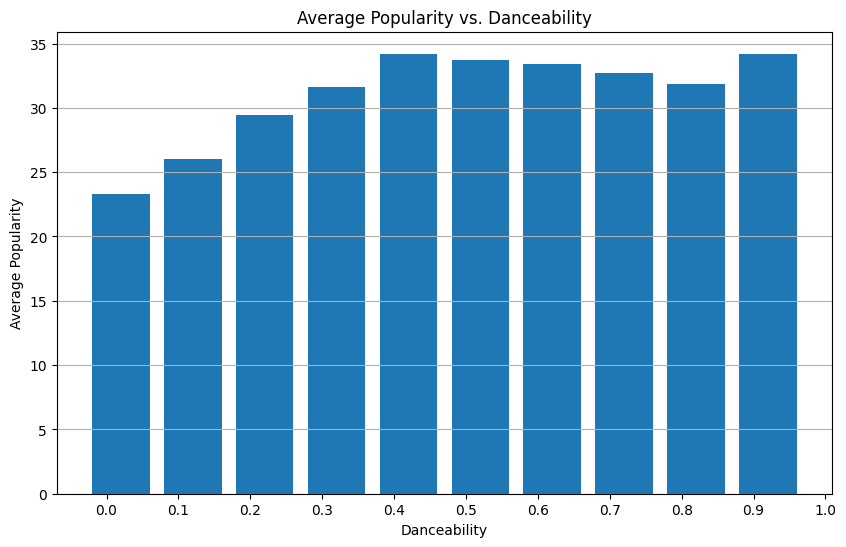

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
danceability_bins = np.arange(0, 1.1, 0.1)
popularity_means = []
for i in range(len(danceability_bins)-1):
    bin_mask = (data['danceability'] >= danceability_bins[i]) & (data['danceability'] < danceability_bins[i+1])
    popularity_mean = data.loc[bin_mask, 'popularity'].mean()
    popularity_means.append(popularity_mean)

bar_width = 0.08  # Adjust the width of the bars
gap = 0.02  # Adjust the gap between bars
plt.figure(figsize=(10, 6))
plt.bar(danceability_bins[:-1] + gap, popularity_means, width=bar_width)
plt.title('Average Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Average Popularity')
plt.xticks(danceability_bins)
plt.grid(axis='y')
plt.show()


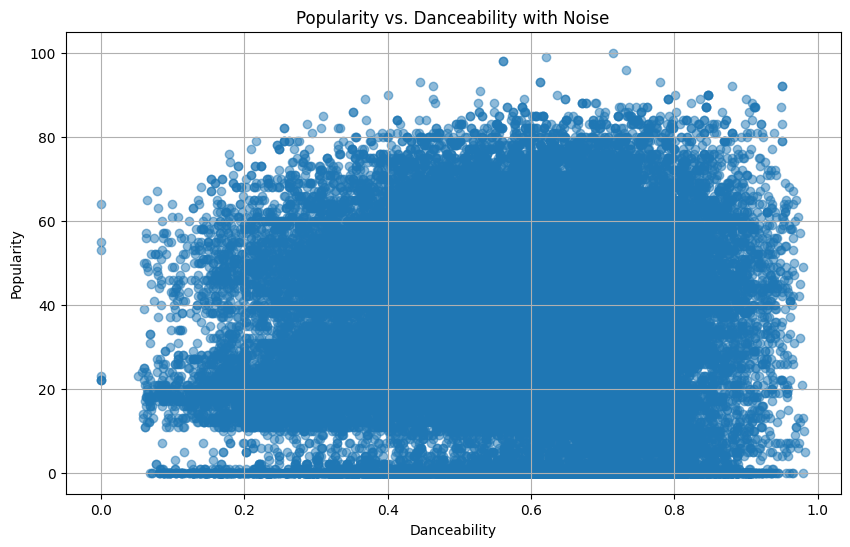

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

noise_level = 0.00009  # Adjust this parameter to control the amount of noise

data['danceability_noisy'] = data['danceability'] + np.random.uniform(-noise_level, noise_level, len(data))

plt.figure(figsize=(10, 6))
plt.scatter(data['danceability_noisy'], data['popularity'], alpha=0.5)
plt.title('Popularity vs. Danceability with Noise')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.30246743 0.17415728]


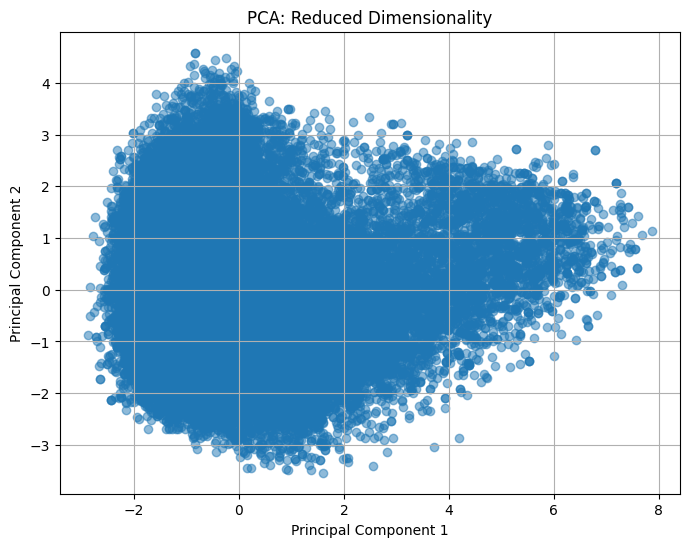

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Selecting relevant features for dimensionality reduction
X = data[['danceability', 'energy', 'loudness', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate PCA with the number of components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the data after dimensionality reduction
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA: Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
